In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import IPython.display as display
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os,random
import matplotlib.pyplot as plt

In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:

IMAGE_HEIGHT=128
IMAGE_WIDTH=128
BATCH_SIZE=64

In [5]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory="/content/drive/MyDrive/shim 22-4-21/train",
                                                     shuffle=True,
                                                     target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                     class_mode='categorical')
validation_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory="/content/drive/MyDrive/shim 22-4-21/test",
                                                     shuffle=True,
                                                     target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                     class_mode='categorical')


Found 5402 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [6]:
def plotimages(imagesls):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for image,ax in zip(imagesls, axes):
    ax.imshow(image)
    ax.axis('off')

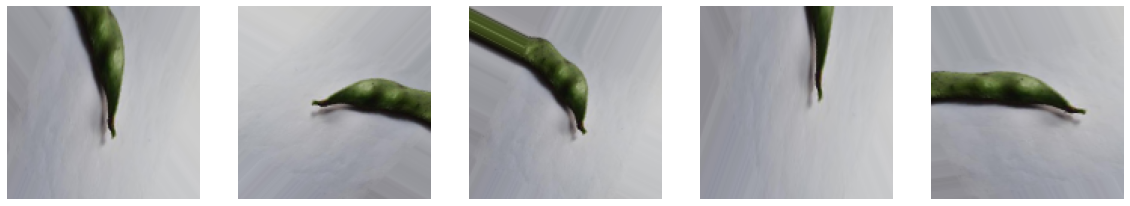

In [7]:
plotimages([train_data_gen[0][0][0] for i in range(5)])

In [20]:
def Mynew_CNNmodel():

  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), padding='same',activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  opt=tf.keras.optimizers.Adam(0.001)
  model.compile(optimizer=opt,
              loss='binary_crossentropy', # loss='categorical_crossentropy' if softmax
              metrics=['accuracy'])

  return model

In [21]:
new_model=Mynew_CNNmodel()
new_hist=new_model.fit_generator(train_data_gen,epochs=20,validation_data=validation_data_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
85/85 [==============================] - 1667s 20s/step - loss: 0.6328 - accuracy: 0.8716 - val_loss: 1.9169 - val_accuracy: 0.1111
Epoch 2/20
85/85 [==============================] - 37s 437ms/step - loss: 0.3501 - accuracy: 0.8889 - val_loss: 1.1113 - val_accuracy: 0.2040
Epoch 3/20
85/85 [==============================] - 37s 435ms/step - loss: 0.3497 - accuracy: 0.8889 - val_loss: 0.5088 - val_accuracy: 0.8068
Epoch 4/20
85/85 [==============================] - 37s 436ms/step - loss: 0.3496 - accuracy: 0.8889 - val_loss: 0.4854 - val_accuracy: 0.8702
Epoch 5/20
85/85 [==============================] - 37s 436ms/step - loss: 0.3495 - accuracy: 0.8889 - val_loss: 0.4080 - val_accuracy: 0.8817
Epoch 6/20
85/85 [==============================] - 37s 439ms/step - loss: 0.3494 - accuracy: 0.8889 - val_loss: 0.3713 - val_accuracy: 0.8889
Epoch 7/20
85/85 [==============================] - 37s 437ms/step - loss: 0.3495 - accuracy: 0.8889 - val_loss: 0.3605 - val_accuracy: 0.8889

In [22]:

def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


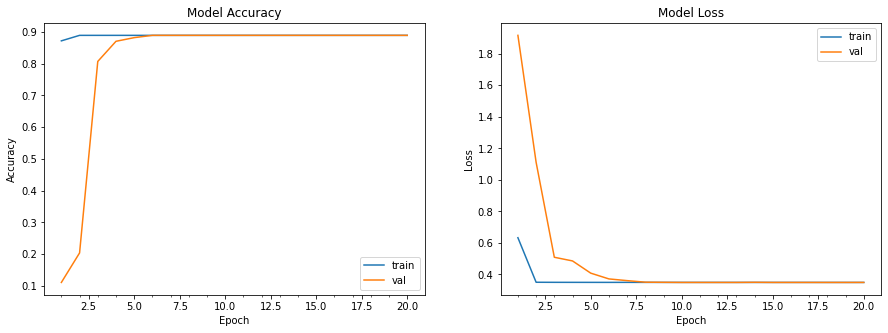

In [23]:
plot_model_history(new_hist)

In [26]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

vggmodel = tf.keras.models.Model(pre_trained_model.input, x)

vggmodel.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

vggmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
vgghist=vggmodel.fit_generator(train_data_gen,epochs=20,validation_data=validation_data_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
85/85 [==============================] - 101s 1s/step - loss: 0.4060 - accuracy: 0.8687 - val_loss: 0.3543 - val_accuracy: 0.8889
Epoch 2/20
85/85 [==============================] - 40s 468ms/step - loss: 0.3707 - accuracy: 0.8885 - val_loss: 0.3533 - val_accuracy: 0.8889
Epoch 3/20
85/85 [==============================] - 40s 470ms/step - loss: 0.3665 - accuracy: 0.8886 - val_loss: 0.3515 - val_accuracy: 0.8889
Epoch 4/20
85/85 [==============================] - 40s 476ms/step - loss: 0.3637 - accuracy: 0.8889 - val_loss: 0.3513 - val_accuracy: 0.8889
Epoch 5/20
85/85 [==============================] - 40s 473ms/step - loss: 0.3617 - accuracy: 0.8889 - val_loss: 0.3509 - val_accuracy: 0.8889
Epoch 6/20
85/85 [==============================] - 40s 474ms/step - loss: 0.3600 - accuracy: 0.8889 - val_loss: 0.3507 - val_accuracy: 0.8889
Epoch 7/20
85/85 [==============================] - 40s 472ms/step - loss: 0.3589 - accuracy: 0.8889 - val_loss: 0.3505 - val_accuracy: 0.8889
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


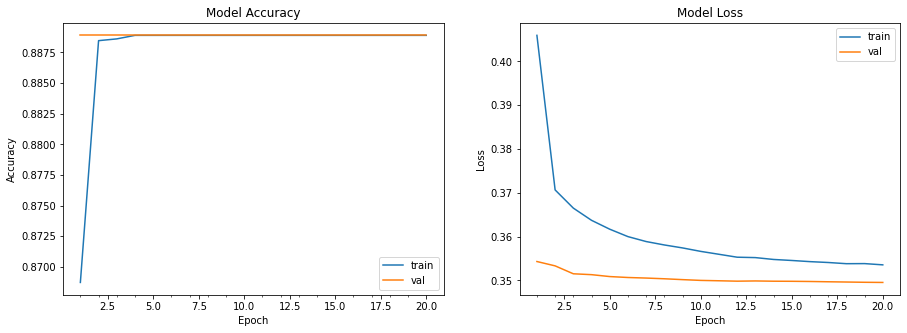

In [28]:
plot_model_history(vgghist)

In [29]:
loss, accuracy = vggmodel.evaluate_generator(train_data_gen)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test: accuracy = 0.888889  ;  loss = 0.349533 


In [30]:
loss, accuracy = new_model.evaluate_generator(validation_data_gen)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test: accuracy = 0.888889  ;  loss = 0.349075 


In [31]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [34]:
Y_pred = vggmodel.predict_generator(validation_data_gen)

y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [35]:
import itertools  

In [38]:
target_names = []

for key in train_data_gen.class_indices:

    target_names.append(key)

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(validation_data_gen.classes, y_pred)

Normalized confusion matrix


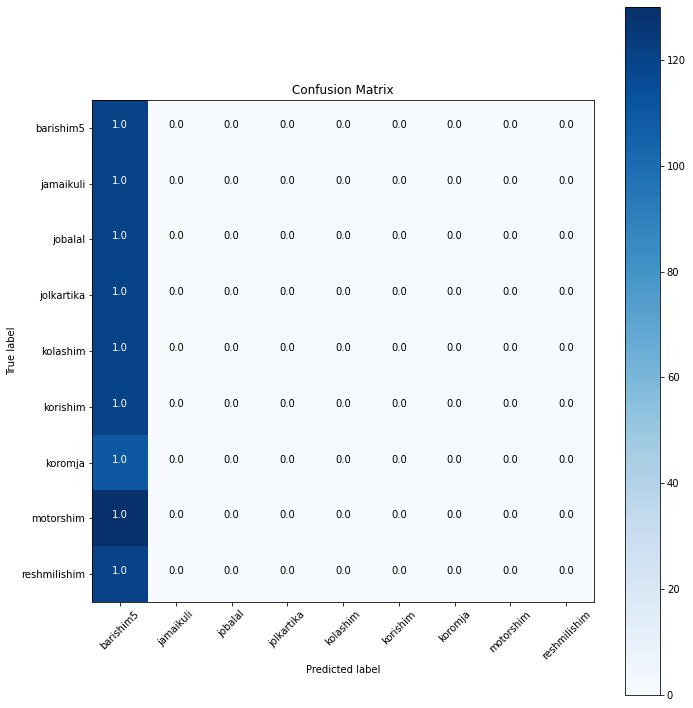

In [43]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [45]:
 from sklearn.metrics import classification_report

In [47]:
print('Classification Report')

print(classification_report(validation_data_gen.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   barishim5       0.11      1.00      0.20       120
   jamaikuli       0.00      0.00      0.00       120
     jobalal       0.00      0.00      0.00       120
  jolkartika       0.00      0.00      0.00       120
    kolashim       0.00      0.00      0.00       120
    korishim       0.00      0.00      0.00       120
     koromja       0.00      0.00      0.00       110
   motorshim       0.00      0.00      0.00       130
reshmilishim       0.00      0.00      0.00       120

    accuracy                           0.11      1080
   macro avg       0.01      0.11      0.02      1080
weighted avg       0.01      0.11      0.02      1080



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
